In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install --upgrade pandas

Note: you may need to restart the kernel to use updated packages.


### Loading a dataset from seaborn for demonstration


In [3]:
data=sns.load_dataset('car_crashes')

In [4]:
data.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [5]:
data.isnull().mean()*100

total             0.0
speeding          0.0
alcohol           0.0
not_distracted    0.0
no_previous       0.0
ins_premium       0.0
ins_losses        0.0
abbrev            0.0
dtype: float64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
 7   abbrev          51 non-null     object 
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


### OUTLIER TREATMENT

#### BOXPLOT

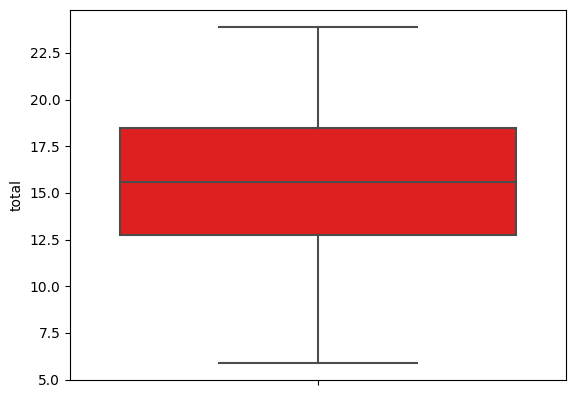

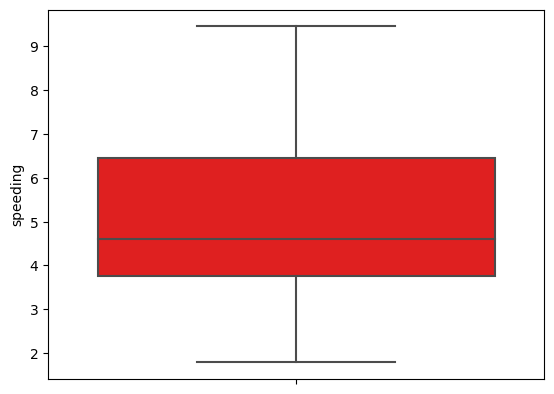

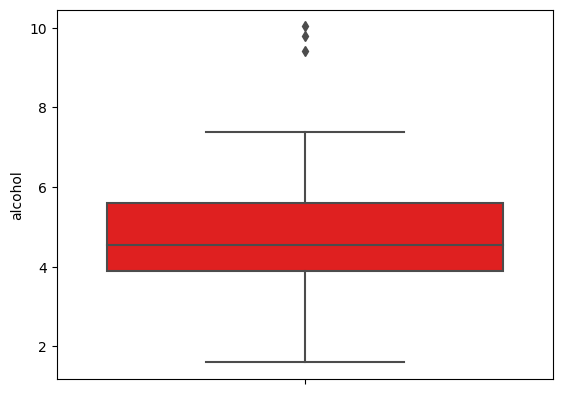

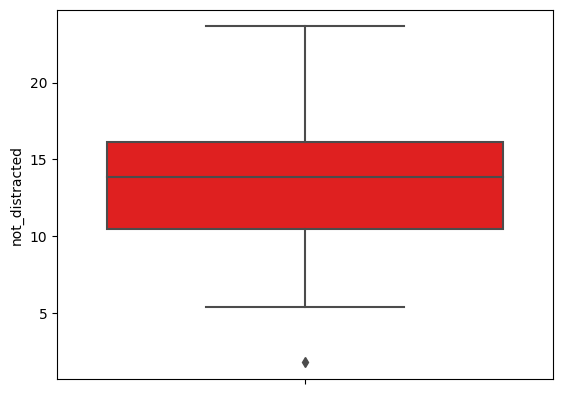

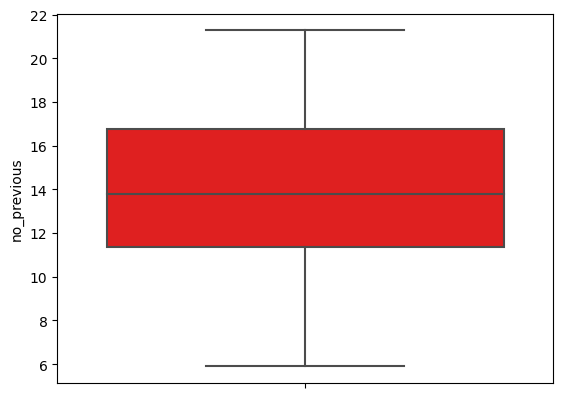

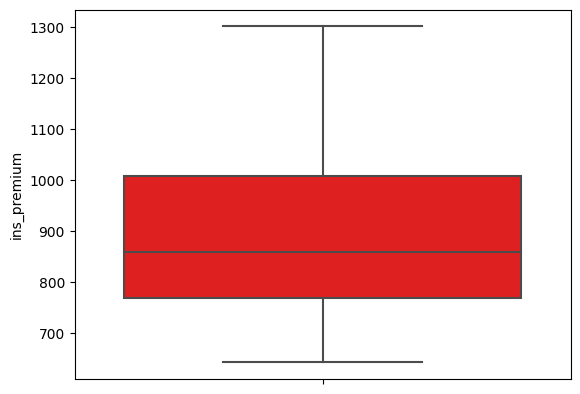

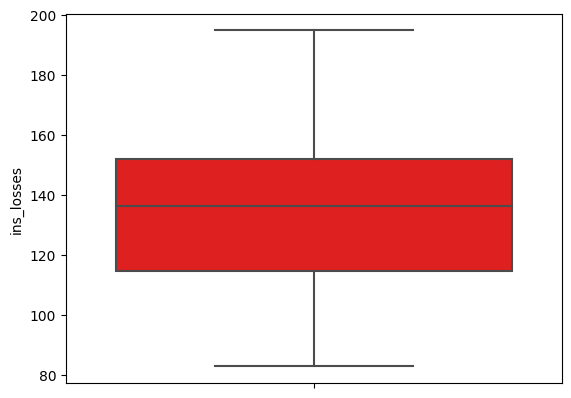

In [7]:
for i in data.columns:
    if data[i].dtype != "object":
        sns.boxplot(y=data[i], color="red")
        plt.show();

### SETTING OUTLIER LIMITS:

In [8]:
def outlier_limit(col):
    Q3, Q1 =np.nanpercentile(col,[75,25])
    IQR =Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*Q1
    return UL,LL

In [9]:
for column in data.columns:
    if data[column].dtype != "object":
        UL, LL = outlier_limit(data[column])
        data[column]=np.where((data[column]>UL) |(data[column]<LL),np.nan,data[i])

### LETS PLOT THE BARPLOT AGAIN TO SEE THE DIFFERENCE

In [13]:
for i in data.columns:
    if data[i].dtype != "object":
        sns.boxplot(y=data[i], color="green")
        plt.show();

### WE CAN SEE THAT THE OUTLIERS ARE TREATED